In [244]:
!pip install pandas

In [245]:
import pandas as pd 
df = pd.read_csv("mammographic_masses_data.csv")



In [246]:
print(df)
print(df.head())
print(df.describe())
print(df.isnull().sum())

      BA   Age  Shape  Margin  Density  Severity
0    5.0  67.0    3.0     5.0      3.0         1
1    4.0  43.0    1.0     1.0      NaN         1
2    5.0  58.0    4.0     5.0      3.0         1
3    4.0  28.0    1.0     1.0      3.0         0
4    5.0  74.0    1.0     5.0      NaN         1
..   ...   ...    ...     ...      ...       ...
956  4.0  47.0    2.0     1.0      3.0         0
957  4.0  56.0    4.0     5.0      3.0         1
958  4.0  64.0    4.0     5.0      3.0         0
959  5.0  66.0    4.0     5.0      3.0         1
960  4.0  62.0    3.0     3.0      3.0         0

[961 rows x 6 columns]
    BA   Age  Shape  Margin  Density  Severity
0  5.0  67.0    3.0     5.0      3.0         1
1  4.0  43.0    1.0     1.0      NaN         1
2  5.0  58.0    4.0     5.0      3.0         1
3  4.0  28.0    1.0     1.0      3.0         0
4  5.0  74.0    1.0     5.0      NaN         1
               BA         Age       Shape      Margin     Density    Severity
count  959.000000  956.00000

In [247]:
df_malignant = df.loc[df['Severity'] == 1] 
print(df_malignant)


      BA   Age  Shape  Margin  Density  Severity
0    5.0  67.0    3.0     5.0      3.0         1
1    4.0  43.0    1.0     1.0      NaN         1
2    5.0  58.0    4.0     5.0      3.0         1
4    5.0  74.0    1.0     5.0      NaN         1
8    5.0  57.0    1.0     5.0      3.0         1
..   ...   ...    ...     ...      ...       ...
951  5.0  67.0    4.0     5.0      3.0         1
952  4.0  68.0    4.0     4.0      3.0         1
955  4.0  52.0    4.0     4.0      3.0         1
957  4.0  56.0    4.0     5.0      3.0         1
959  5.0  66.0    4.0     5.0      3.0         1

[445 rows x 6 columns]


In [248]:
!pip install plotly

In [249]:
import plotly.express as px 
fig1 = px.bar(df, y = 'Shape', x = 'Age')

fig1.show()

In [250]:
df_uncleaned=df.copy()
df_cleaned=df.copy()
df_cleaned=df_cleaned.dropna()

In [251]:

import plotly.express as pt
fig_scatter = pt.scatter(df, x='Age', y='Margin', color='Severity', color_continuous_scale='Portland',
                         title='Scatterplot of Age vs. Margin, Colored by Severity')
fig_scatter.show()

numerical_features = ['BA', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
corr_matrix = df[numerical_features].corr()
fig_heatmap = pt.imshow(corr_matrix, text_auto=True,
                       title='Correlation Matrix Heatmap of Numerical Features')
fig_heatmap.show()

fig_hist = pt.histogram(df, x='Age', title='Distribution of Patient Age')
fig_hist.show()

severity_counts = df['Severity'].value_counts()
pie_df = pd.DataFrame({'Severity': severity_counts.index, 'Count': severity_counts.values})
fig_pie=pt.pie(pie_df, values='Count', names='Severity', title='Distribution of Severity (Benign (0) vs. Malignant (1))', labels={0: 'Benign', 1: 'Malignant'})
fig_pie.show()

In [252]:


df_clean = df.dropna()
print(df_clean) 



      BA   Age  Shape  Margin  Density  Severity
0    5.0  67.0    3.0     5.0      3.0         1
2    5.0  58.0    4.0     5.0      3.0         1
3    4.0  28.0    1.0     1.0      3.0         0
8    5.0  57.0    1.0     5.0      3.0         1
10   5.0  76.0    1.0     4.0      3.0         1
..   ...   ...    ...     ...      ...       ...
956  4.0  47.0    2.0     1.0      3.0         0
957  4.0  56.0    4.0     5.0      3.0         1
958  4.0  64.0    4.0     5.0      3.0         0
959  5.0  66.0    4.0     5.0      3.0         1
960  4.0  62.0    3.0     3.0      3.0         0

[830 rows x 6 columns]


In [273]:
df_normalized=df_clean.copy()

def normalize(series):
    min_val=series.min()
    max_val=series.max()
    return [(x - min_val) / (max_val - min_val) for x in series]
for col in ['Age', 'BA', 'Density']:
    df_normalized[col] = normalize(df_normalized[col])

print(df_normalized)
print(df.head())


           BA       Age  Shape  Margin   Density  Severity
0    0.833333  0.628205    3.0     5.0  0.666667         1
2    0.833333  0.512821    4.0     5.0  0.666667         1
3    0.666667  0.128205    1.0     1.0  0.666667         0
8    0.833333  0.500000    1.0     5.0  0.666667         1
10   0.833333  0.743590    1.0     4.0  0.666667         1
..        ...       ...    ...     ...       ...       ...
956  0.666667  0.371795    2.0     1.0  0.666667         0
957  0.666667  0.487179    4.0     5.0  0.666667         1
958  0.666667  0.589744    4.0     5.0  0.666667         0
959  0.833333  0.615385    4.0     5.0  0.666667         1
960  0.666667  0.564103    3.0     3.0  0.666667         0

[830 rows x 6 columns]
    BA   Age  Shape  Margin  Density  Severity
0  5.0  67.0    3.0     5.0      3.0         1
1  4.0  43.0    1.0     1.0      NaN         1
2  5.0  58.0    4.0     5.0      3.0         1
3  4.0  28.0    1.0     1.0      3.0         0
4  5.0  74.0    1.0     5.0      

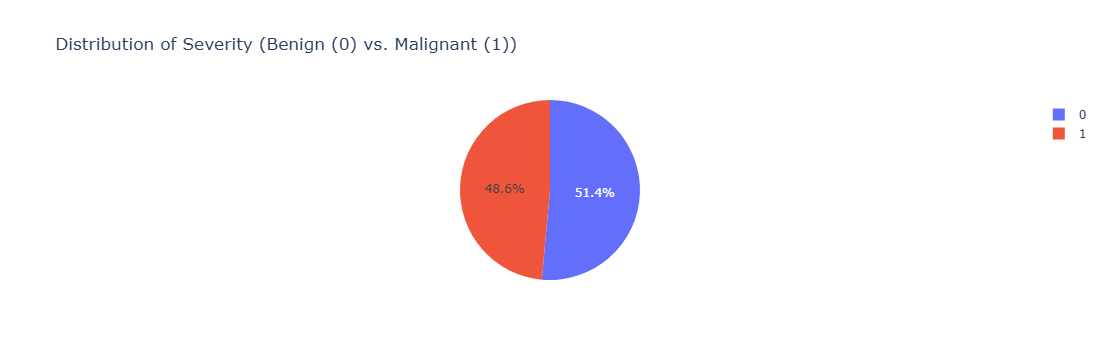

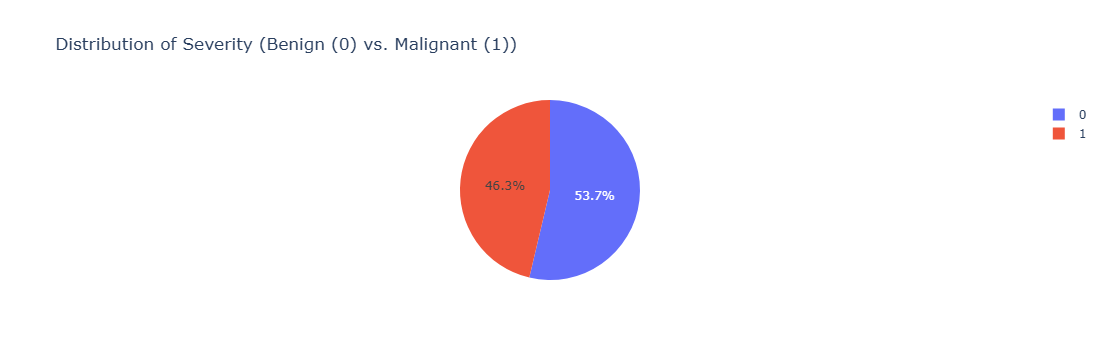

In [254]:
fig_scatter_normalized = pt.scatter(df_normalized, x='Age', y='Margin', color='Severity', color_continuous_scale='Portland',
                         title='Scatterplot of Age vs. Margin, Colored by Severity')
# fig_scatter_normalized.show()
# fig_scatter.show()

numerical_features = ['BA', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
corr_matrix = df_normalized[numerical_features].corr()
fig_heatmap_normalized = pt.imshow(corr_matrix, text_auto=True,
                       title='Correlation Matrix Heatmap of Numerical Features')
# fig_heatmap_normalized.show()
# fig_heatmap.show()

severity_counts = df_normalized['Severity'].value_counts()
pie_df = pd.DataFrame({'Severity': severity_counts.index, 'Count': severity_counts.values})
fig_pie_normalized=pt.pie(pie_df, values='Count', names='Severity', title='Distribution of Severity (Benign (0) vs. Malignant (1))', labels={0: 'Benign', 1: 'Malignant'})
fig_pie_normalized.show()
fig_pie.show()

In [269]:
!pip install scikit-learn

In [303]:
from sklearn.feature_selection import VarianceThreshold 

# sel = VarianceThreshold(threshold = 0.1) 
# sel.fit_transform(df_normalized) 


threshold = 0.1  
selector = VarianceThreshold(threshold)
selector.fit(df_normalized)
high_variance_indices = selector.get_support(indices=True)
selected_data = df_normalized.iloc[:, high_variance_indices]

print(selected_data) 




     Shape  Margin  Severity
0      3.0     5.0         1
2      4.0     5.0         1
3      1.0     1.0         0
8      1.0     5.0         1
10     1.0     4.0         1
..     ...     ...       ...
956    2.0     1.0         0
957    4.0     5.0         1
958    4.0     5.0         0
959    4.0     5.0         1
960    3.0     3.0         0

[830 rows x 3 columns]
